<a href="https://colab.research.google.com/github/herkart1011/MachineLearningTasks/blob/main/Week%203/MaterialStrength_Hero_Kartiko_1103210205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Decision Tree**

In [6]:
# Mengimpor library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from google.colab import drive

In [7]:
#Import dataset
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Dataset/Week 3/MaterialStrength.csv')

dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,target_feature
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,540.0,1.538462,1,0.350044,YEs,NO,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,540.0,1.560651,1,0.452416,yES,nOO,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.685714,475.0,1.569024,0,6.704743,yEs,NO,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.685714,475.0,1.569024,0,8.891596,yes,NOO,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.966767,331.0,1.185221,0,8.126411,YeS,no,44.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,0.649783,482.7,1.132500,1,0.632340,Yes,nO,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,0.608318,437.8,1.005532,1,0.898012,yES,nO,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,1.297643,396.5,1.144103,1,1.181435,yes,Noo,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,1.103708,345.8,1.254405,1,0.854440,Yes,NO,32.77


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 128.9+ KB


In [9]:
# Ubah nilai string menjadi integer pada kolom x14 dan x15 menggunakan LabelEncoder
label_encoder = LabelEncoder()
dataset['x14'] = label_encoder.fit_transform(dataset['x14'])
dataset['x15'] = label_encoder.fit_transform(dataset['x15'])

In [10]:
# Memisahkan fitur dan target
X = dataset.drop(columns=['target_feature'])  # Semua kolom kecuali target
y = dataset['target_feature']  # Kolom target

In [11]:
# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Membangun model Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=0)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [12]:
# Prediksi dengan Decision Tree
y_pred_tree = decision_tree_model.predict(X_test)

# Membangun model Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


# Prediksi dengan Linear Regression
y_pred_linear = linear_model.predict(X_test)

In [13]:
# Membangun model Polynomial Regression (basis fungsi) - menggunakan derajat polinomial 2 untuk contoh ini
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

linear_poly_model = LinearRegression()
linear_poly_model.fit(X_train_poly, y_train)

# Prediksi dengan Polynomial Regression
y_pred_poly = linear_poly_model.predict(X_test_poly)


In [14]:
# Menghitung MSE, RMSE, dan R-squared untuk Decision Tree
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Menghitung MSE, RMSE, dan R-squared untuk Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [15]:
# Menghitung MSE, RMSE, dan R-squared untuk Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [16]:
# Menampilkan hasil perbandingan
print("Decision Tree Results:")
print(f"MSE: {mse_tree}, \nRMSE: {rmse_tree}, \nR-Squared: {r2_tree}\n")

print("Linear Regression Results:")
print(f"MSE: {mse_linear}, \nRMSE: {rmse_linear}, \nR-Squared: {r2_linear}\n")

print("Polynomial Regression Results:")
print(f"MSE: {mse_poly}, \nRMSE: {rmse_poly}, \nR-Squared: {r2_poly}")

Decision Tree Results:
MSE: 20.50026148867314, 
RMSE: 4.527721445569851, 
R-Squared: 0.9177485223551316

Linear Regression Results:
MSE: 82.49233309076054, 
RMSE: 9.082529003023362, 
R-Squared: 0.6690229393007179

Polynomial Regression Results:
MSE: 66.55090863465259, 
RMSE: 8.157874026647665, 
R-Squared: 0.7329833779518733


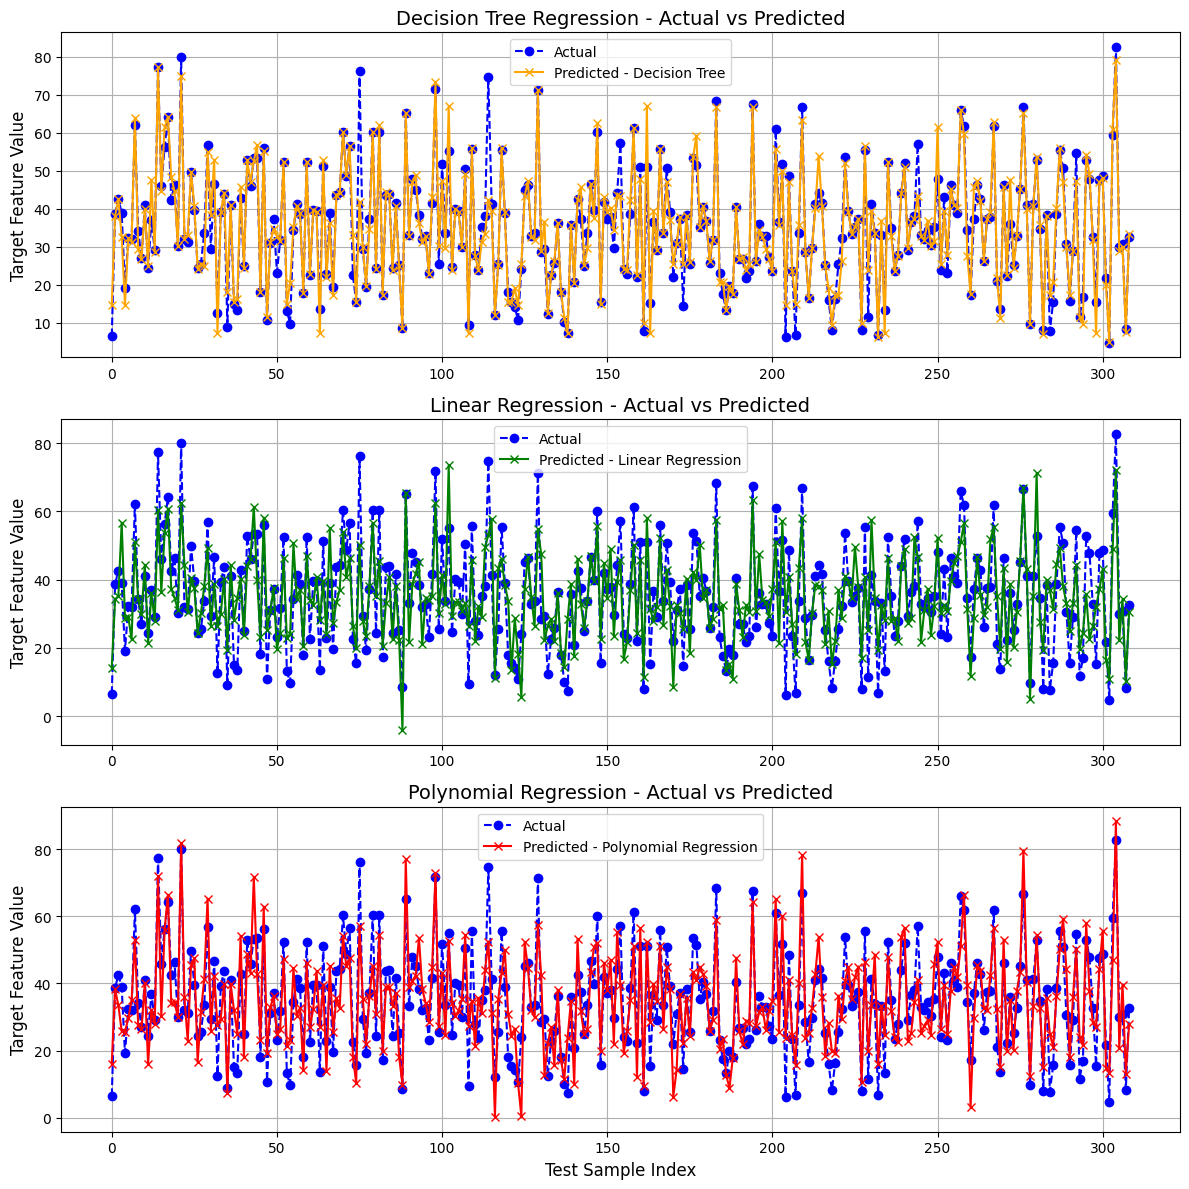

In [17]:
# Memperbaiki visualisasi untuk hasil prediksi yang lebih rapi

plt.figure(figsize=(12, 12))

# Plot untuk Decision Tree
plt.subplot(3, 1, 1)
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o', markersize=6, color='blue', linestyle='dashed', linewidth=1.5)
plt.plot(range(len(y_test)), y_pred_tree, label="Predicted - Decision Tree", marker='x', markersize=6, color='orange', linestyle='-', linewidth=1.5)
plt.title("Decision Tree Regression - Actual vs Predicted", fontsize=14)
plt.ylabel("Target Feature Value", fontsize=12)
plt.legend()
plt.grid(True)

# Plot untuk Linear Regression
plt.subplot(3, 1, 2)
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o', markersize=6, color='blue', linestyle='dashed', linewidth=1.5)
plt.plot(range(len(y_test)), y_pred_linear, label="Predicted - Linear Regression", marker='x', markersize=6, color='green', linestyle='-', linewidth=1.5)
plt.title("Linear Regression - Actual vs Predicted", fontsize=14)
plt.ylabel("Target Feature Value", fontsize=12)
plt.legend()
plt.grid(True)

# Plot untuk Polynomial Regression
plt.subplot(3, 1, 3)
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o', markersize=6, color='blue', linestyle='dashed', linewidth=1.5)
plt.plot(range(len(y_test)), y_pred_poly, label="Predicted - Polynomial Regression", marker='x', markersize=6, color='red', linestyle='-', linewidth=1.5)
plt.title("Polynomial Regression - Actual vs Predicted", fontsize=14)
plt.xlabel("Test Sample Index", fontsize=12)
plt.ylabel("Target Feature Value", fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


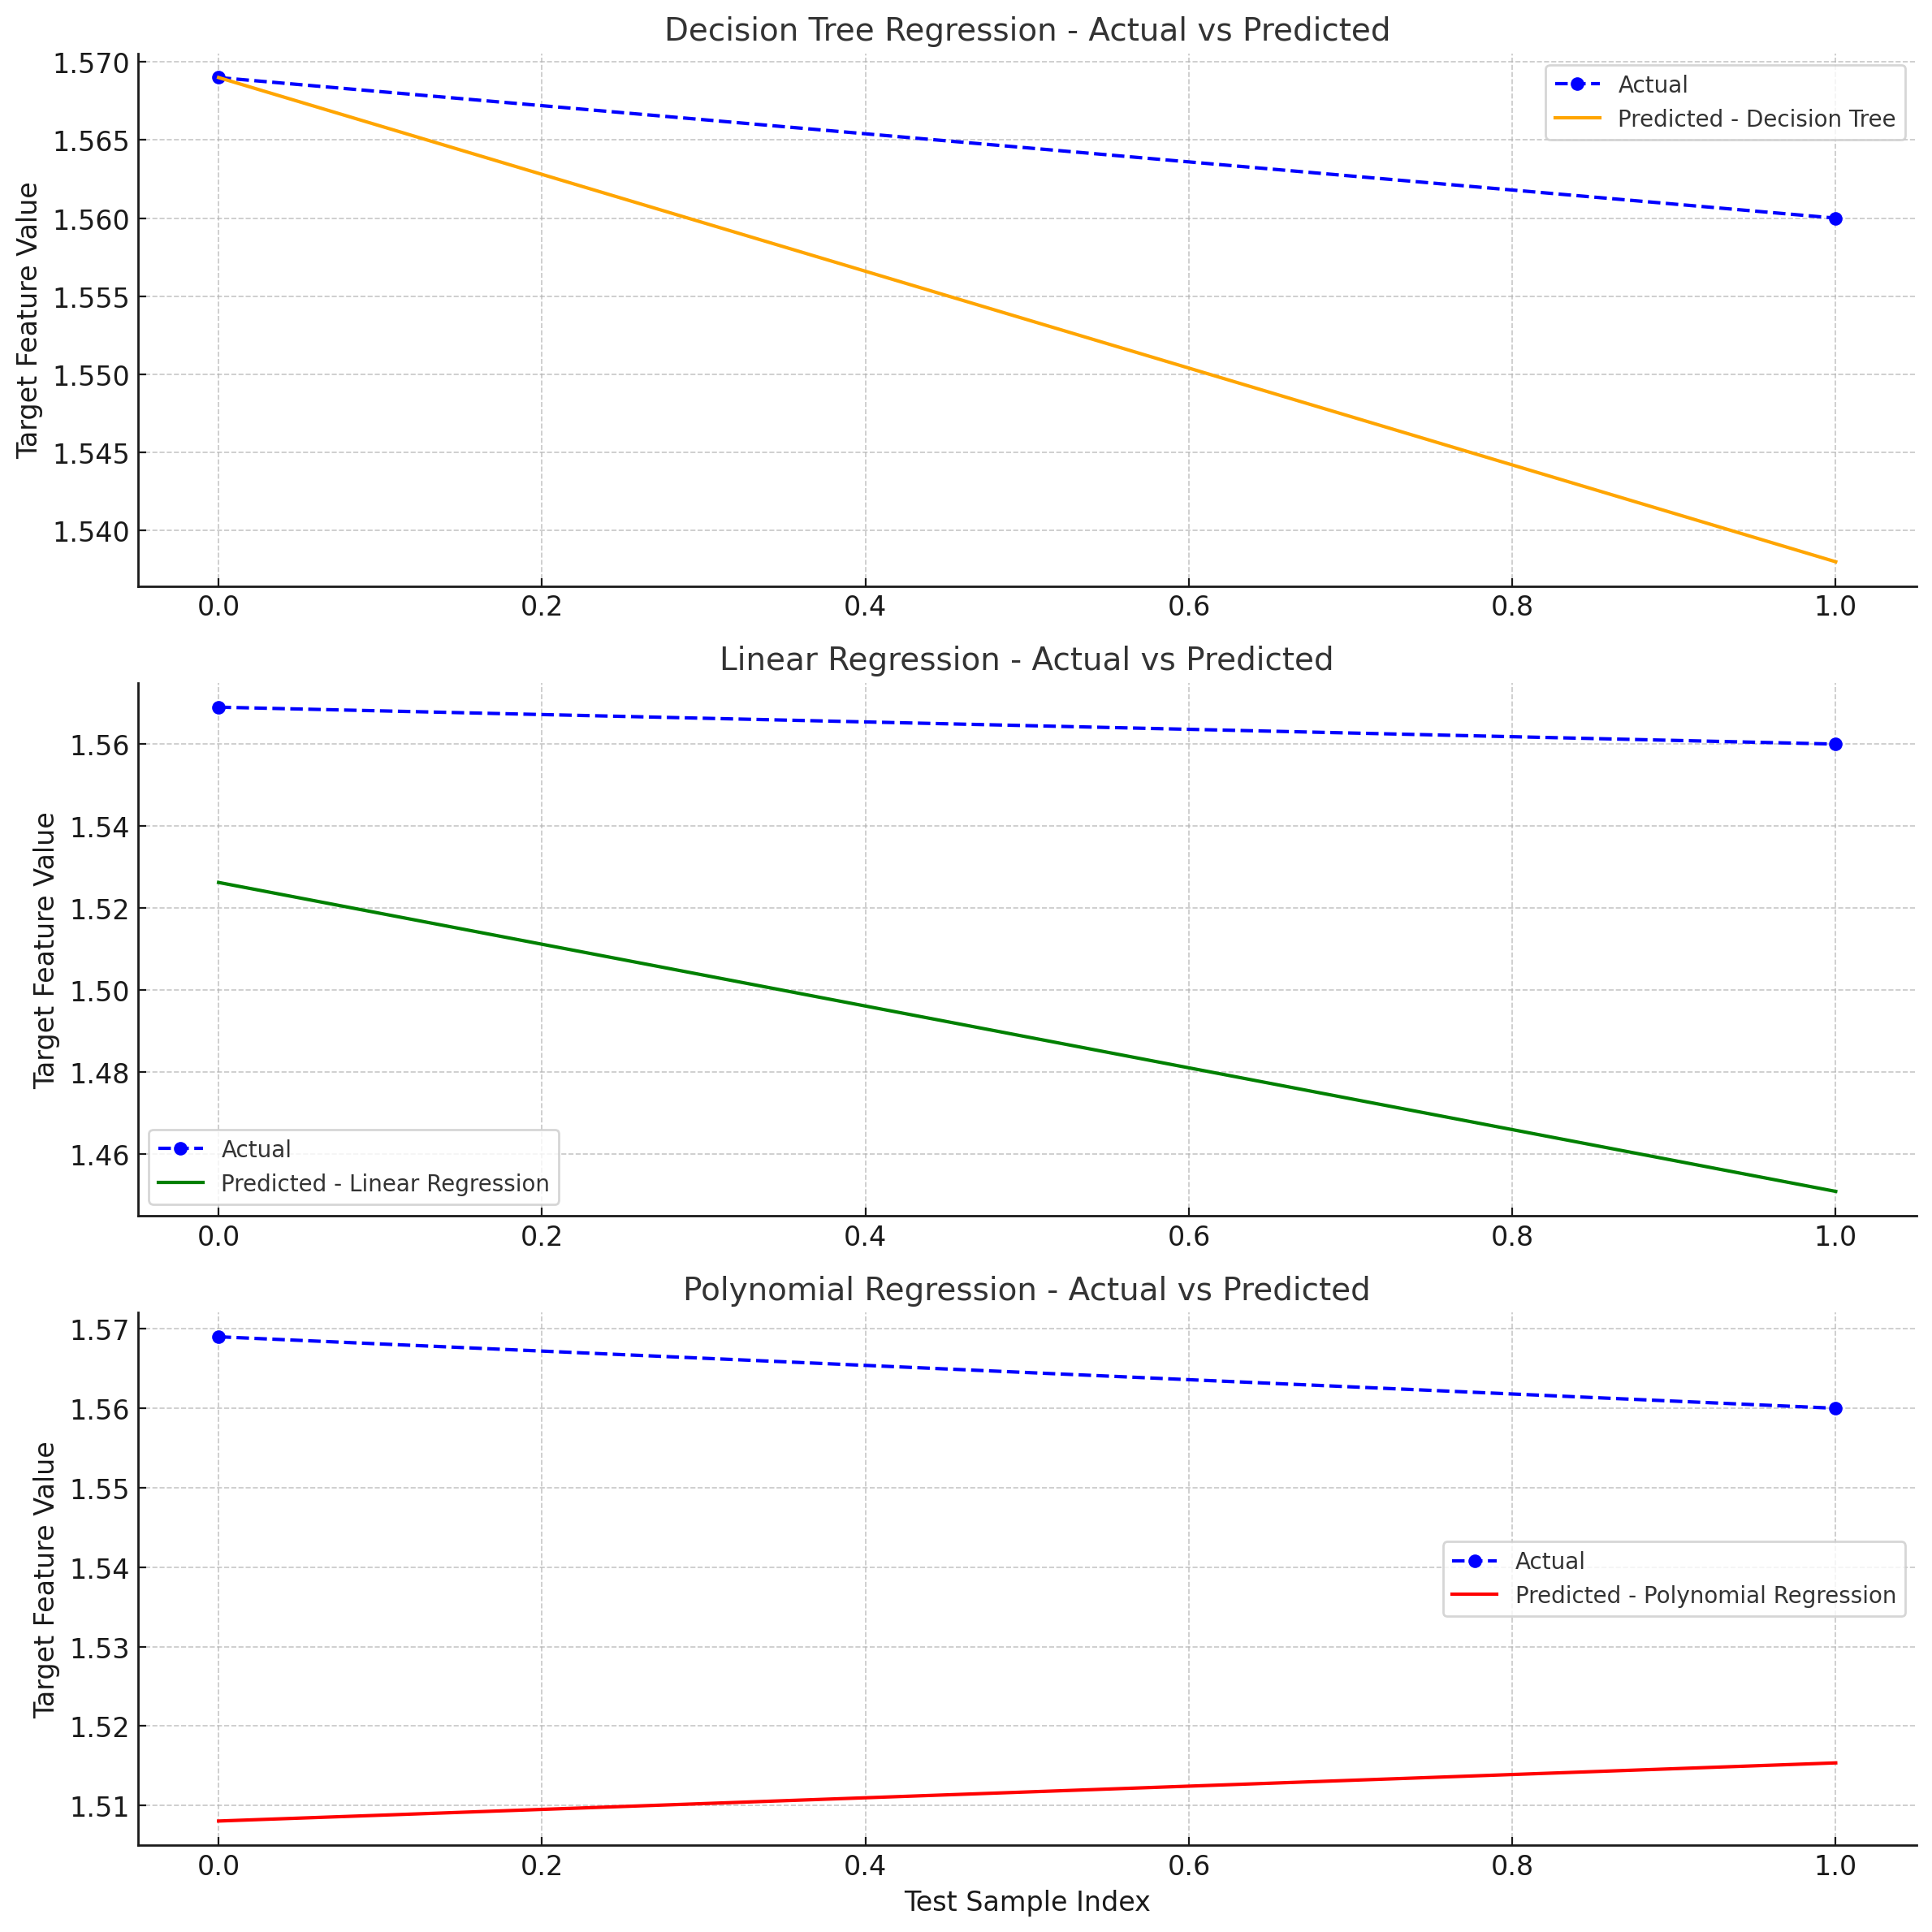

## **K-NN**

In [18]:
# Mengimpor library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [20]:
#Import dataset
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Dataset/Week 3/MaterialStrength.csv')

dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,target_feature
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,540.0,1.538462,1,0.350044,YEs,NO,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,540.0,1.560651,1,0.452416,yES,nOO,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.685714,475.0,1.569024,0,6.704743,yEs,NO,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.685714,475.0,1.569024,0,8.891596,yes,NOO,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.966767,331.0,1.185221,0,8.126411,YeS,no,44.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,0.649783,482.7,1.132500,1,0.632340,Yes,nO,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,0.608318,437.8,1.005532,1,0.898012,yES,nO,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,1.297643,396.5,1.144103,1,1.181435,yes,Noo,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,1.103708,345.8,1.254405,1,0.854440,Yes,NO,32.77


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 128.9+ KB


In [22]:
# Ubah nilai string menjadi integer pada kolom x14 dan x15 menggunakan LabelEncoder
label_encoder = LabelEncoder()
dataset['x14'] = label_encoder.fit_transform(dataset['x14'])
dataset['x15'] = label_encoder.fit_transform(dataset['x15'])

In [23]:
# Memisahkan fitur dan target
X = dataset.drop(columns=['target_feature'])  # Semua kolom kecuali target
y = dataset['target_feature']  # Kolom target

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)


In [24]:
# Melakukan standardisasi data (sangat penting untuk KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# ----- Model 1: KNN Regression -----
knn_model = KNeighborsRegressor(n_neighbors=5)  # Model KNN dengan 5 tetangga
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# ----- Model 2: Decision Tree Regressor -----
decision_tree_model = DecisionTreeRegressor(random_state=0)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

# ----- Model 3: Linear Regression -----
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# ----- Model 4: Polynomial Regression (basis fungsi) - menggunakan derajat polinomial 2 -----
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [26]:
linear_poly_model = LinearRegression()
linear_poly_model.fit(X_train_poly, y_train)
y_pred_poly = linear_poly_model.predict(X_test_poly)

# ----- Evaluasi Model -----
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} : \nMSE: {mse:.4f} \nRMSE: {rmse:.4f} \nR-squared: {r2:.4f}")

In [27]:
evaluate_model(y_test, y_pred_knn, "KNN Regression")

# Evaluasi Decision Tree
evaluate_model(y_test, y_pred_tree, "\nDecision Tree Regression")

# Evaluasi Linear Regression
evaluate_model(y_test, y_pred_linear, "\nLinear Regression")

# Evaluasi Polynomial Regression
evaluate_model(y_test, y_pred_poly, "\nPolynomial Regression")


KNN Regression : 
MSE: 109.3438 
RMSE: 10.4568 
R-squared: 0.5613

Decision Tree Regression : 
MSE: 20.5003 
RMSE: 4.5277 
R-squared: 0.9177

Linear Regression : 
MSE: 82.4923 
RMSE: 9.0825 
R-squared: 0.6690

Polynomial Regression : 
MSE: 66.5509 
RMSE: 8.1579 
R-squared: 0.7330


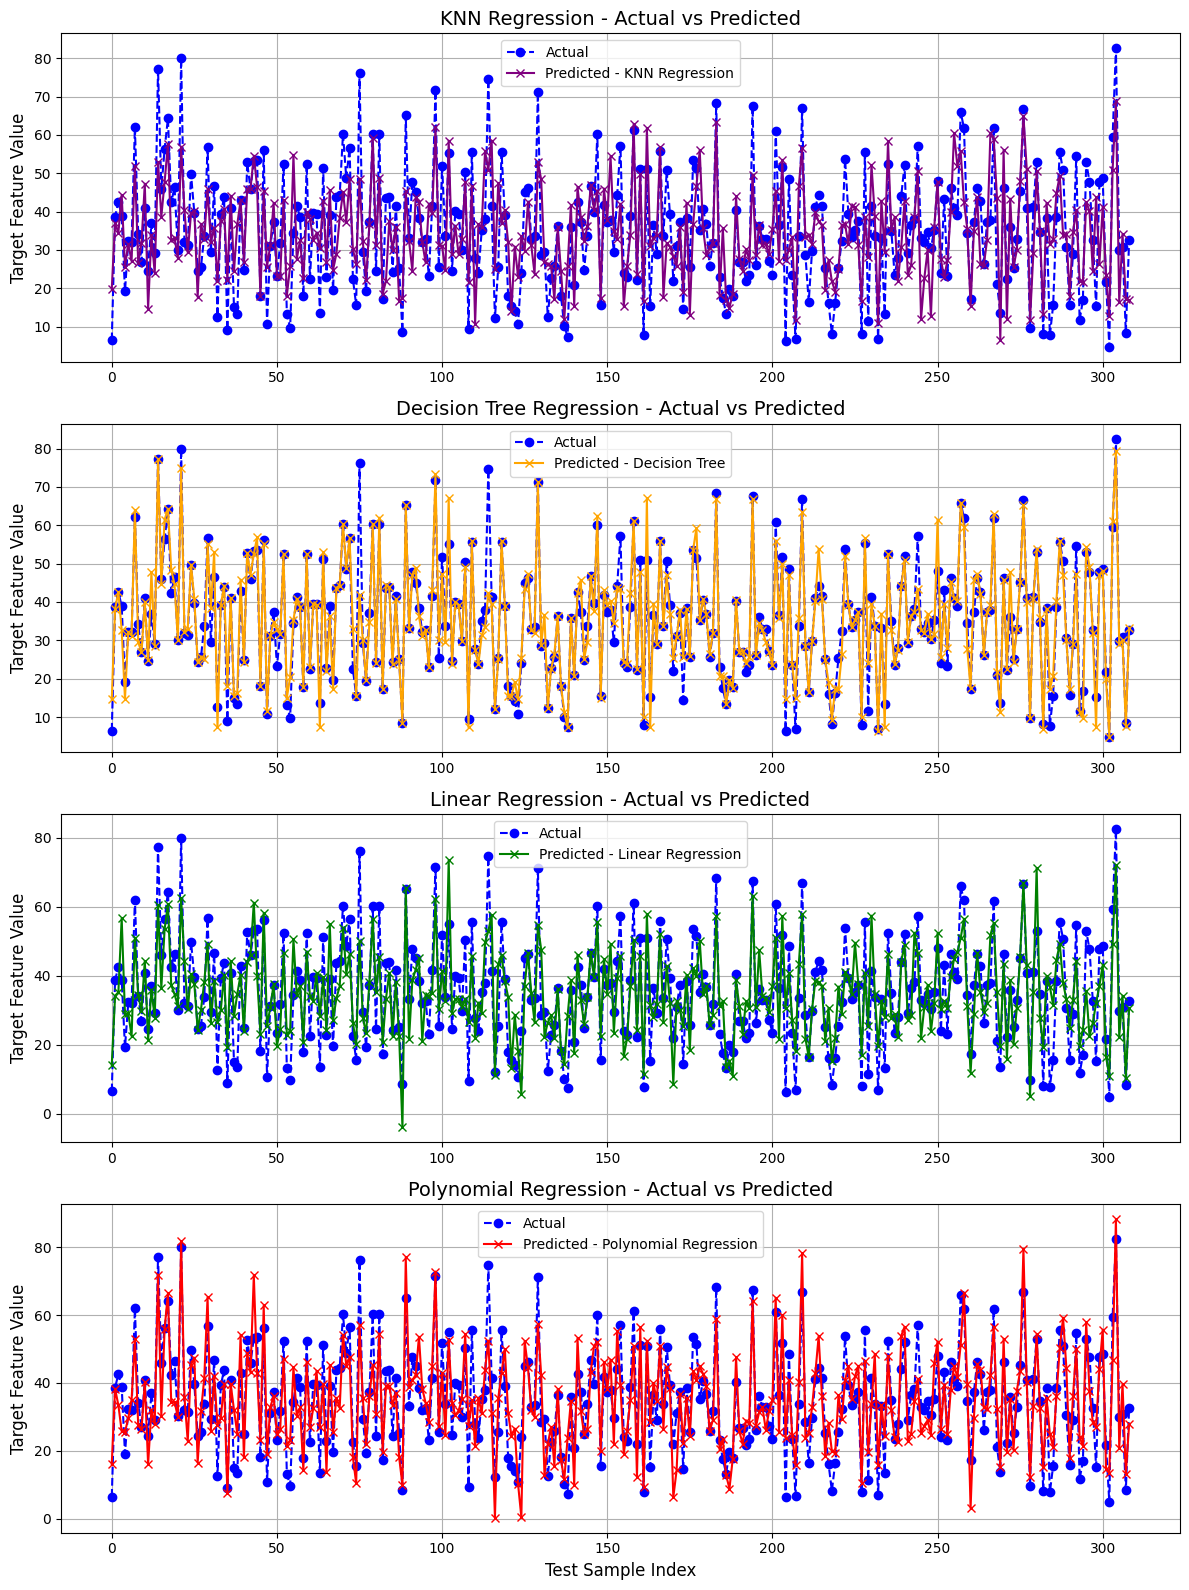

In [28]:
# ----- Visualisasi Hasil -----
plt.figure(figsize=(12, 16))

# Plot untuk KNN Regression
plt.subplot(4, 1, 1)
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o', markersize=6, color='blue', linestyle='dashed', linewidth=1.5)
plt.plot(range(len(y_test)), y_pred_knn, label="Predicted - KNN Regression", marker='x', markersize=6, color='purple', linestyle='-', linewidth=1.5)
plt.title("KNN Regression - Actual vs Predicted", fontsize=14)
plt.ylabel("Target Feature Value", fontsize=12)
plt.legend()
plt.grid(True)

# Plot untuk Decision Tree
plt.subplot(4, 1, 2)
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o', markersize=6, color='blue', linestyle='dashed', linewidth=1.5)
plt.plot(range(len(y_test)), y_pred_tree, label="Predicted - Decision Tree", marker='x', markersize=6, color='orange', linestyle='-', linewidth=1.5)
plt.title("Decision Tree Regression - Actual vs Predicted", fontsize=14)
plt.ylabel("Target Feature Value", fontsize=12)
plt.legend()
plt.grid(True)

# Plot untuk Linear Regression
plt.subplot(4, 1, 3)
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o', markersize=6, color='blue', linestyle='dashed', linewidth=1.5)
plt.plot(range(len(y_test)), y_pred_linear, label="Predicted - Linear Regression", marker='x', markersize=6, color='green', linestyle='-', linewidth=1.5)
plt.title("Linear Regression - Actual vs Predicted", fontsize=14)
plt.ylabel("Target Feature Value", fontsize=12)
plt.legend()
plt.grid(True)

# Plot untuk Polynomial Regression
plt.subplot(4, 1, 4)
plt.plot(range(len(y_test)), y_test, label="Actual", marker='o', markersize=6, color='blue', linestyle='dashed', linewidth=1.5)
plt.plot(range(len(y_test)), y_pred_poly, label="Predicted - Polynomial Regression", marker='x', markersize=6, color='red', linestyle='-', linewidth=1.5)
plt.title("Polynomial Regression - Actual vs Predicted", fontsize=14)
plt.xlabel("Test Sample Index", fontsize=12)
plt.ylabel("Target Feature Value", fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()